<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n20.csv',
 'data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.119198,30.380644,80.249522,0.081810,171.831174,171.746428,0.084746
1,0.0,1.0,49.062167,82.267298,54.386566,0.139430,195.855462,195.731315,0.124147
2,0.0,2.0,48.653011,92.218896,33.070367,0.219671,184.161946,183.956721,0.205225
3,0.0,3.0,42.315509,29.375512,52.525370,-0.084838,134.131552,134.197760,-0.066208
4,0.0,4.0,23.661843,37.726986,39.249263,-0.335472,110.302620,110.603645,-0.301025
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.264803,28.702750,71.004383,-0.085137,179.886798,180.055250,-0.168451
29996,999.0,26.0,60.672015,65.105594,28.925354,0.199179,164.902143,164.706375,0.195767
29997,999.0,27.0,99.509017,94.501909,61.895670,-0.220115,265.686482,265.950368,-0.263886
29998,999.0,28.0,76.501871,75.841690,67.480194,-0.053051,229.770704,229.851324,-0.080620


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.119198,30.380644,80.249522,0.081810,171.831174,171.746428,0.084746
1,0.0,1.0,49.062167,82.267298,54.386566,0.139430,195.855462,195.731315,0.124147
2,0.0,2.0,48.653011,92.218896,33.070367,0.219671,184.161946,183.956721,0.205225
3,0.0,3.0,42.315509,29.375512,52.525370,-0.084838,134.131552,134.197760,-0.066208
4,0.0,4.0,23.661843,37.726986,39.249263,-0.335472,110.302620,110.603645,-0.301025
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.264803,28.702750,71.004383,-0.085137,179.886798,180.055250,-0.168451
29996,999.0,26.0,60.672015,65.105594,28.925354,0.199179,164.902143,164.706375,0.195767
29997,999.0,27.0,99.509017,94.501909,61.895670,-0.220115,265.686482,265.950368,-0.263886
29998,999.0,28.0,76.501871,75.841690,67.480194,-0.053051,229.770704,229.851324,-0.080620


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    51.119198  30.380644  80.249522  ...  171.831174  171.746428  0.084746
      1.0    49.062167  82.267298  54.386566  ...  195.855462  195.731315  0.124147
      2.0    48.653011  92.218896  33.070367  ...  184.161946  183.956721  0.205225
      3.0    42.315509  29.375512  52.525370  ...  134.131552  134.197760 -0.066208
      4.0    23.661843  37.726986  39.249263  ...  110.302620  110.603645 -0.301025
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   70.264803  28.702750  71.004383  ...  179.886798  180.055250 -0.168451
      26.0   60.672015  65.105594  28.925354  ...  164.902143  164.706375  0.195767
      27.0   99.509017  94.501909  61.895670  ...  265.686482  265.950368 -0.263886
      28.0   76.501871  75.841690  67.480194  ...  229.770704  229.851324 -0.080620
      29.0   67.949753  45.345177  41.458335  ...  164.833900  164.801569  0.032331

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    51.119198  30.380644  80.249522  ...  171.831174  171.746428  0.084746
      1.0    49.062167  82.267298  54.386566  ...  195.855462  195.731315  0.124147
      2.0    48.653011  92.218896  33.070367  ...  184.161946  183.956721  0.205225
      3.0    42.315509  29.375512  52.525370  ...  134.131552  134.197760 -0.066208
      4.0    23.661843  37.726986  39.249263  ...  110.302620  110.603645 -0.301025
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   70.264803  28.702750  71.004383  ...  179.886798  180.055250 -0.168451
      26.0   60.672015  65.105594  28.925354  ...  164.902143  164.706375  0.195767
      27.0   99.509017  94.501909  61.895670  ...  265.686482  265.950368 -0.263886
      28.0   76.501871  75.841690  67.480194  ...  229.770704  229.851324 -0.080620
      29.0   67.949753  45.345177  41.458335  ...  164.833900  164.801569  0.032331

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.119198,30.380644,80.249522,0.081810,171.831174,171.746428,0.084746
1,0.0,1.0,49.062167,82.267298,54.386566,0.139430,195.855462,195.731315,0.124147
2,0.0,2.0,48.653011,92.218896,33.070367,0.219671,184.161946,183.956721,0.205225
3,0.0,3.0,42.315509,29.375512,52.525370,-0.084838,134.131552,134.197760,-0.066208
4,0.0,4.0,23.661843,37.726986,39.249263,-0.335472,110.302620,110.603645,-0.301025
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.264803,28.702750,71.004383,-0.085137,179.886798,180.055250,-0.168451
29996,999.0,26.0,60.672015,65.105594,28.925354,0.199179,164.902143,164.706375,0.195767
29997,999.0,27.0,99.509017,94.501909,61.895670,-0.220115,265.686482,265.950368,-0.263886
29998,999.0,28.0,76.501871,75.841690,67.480194,-0.053051,229.770704,229.851324,-0.080620


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    51.119198  30.380644  80.249522  ...  171.831174  171.746428  0.084746
      1.0    49.062167  82.267298  54.386566  ...  195.855462  195.731315  0.124147
      2.0    48.653011  92.218896  33.070367  ...  184.161946  183.956721  0.205225
      3.0    42.315509  29.375512  52.525370  ...  134.131552  134.197760 -0.066208
      4.0    23.661843  37.726986  39.249263  ...  110.302620  110.603645 -0.301025
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   70.264803  28.702750  71.004383  ...  179.886798  180.055250 -0.168451
      26.0   60.672015  65.105594  28.925354  ...  164.902143  164.706375  0.195767
      27.0   99.509017  94.501909  61.895670  ...  265.686482  265.950368 -0.263886
      28.0   76.501871  75.841690  67.480194  ...  229.770704  229.851324 -0.080620
      29.0   67.949753  45.345177  41.458335  ...  164.833900  164.801569  0.032331

[30000 rows x 7 columns]

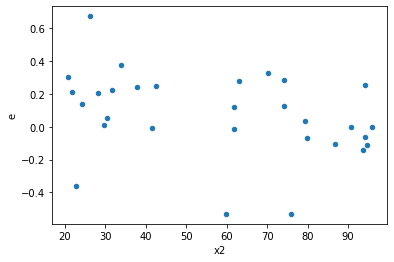

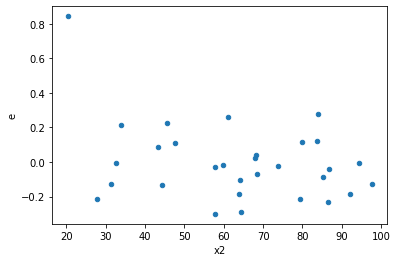

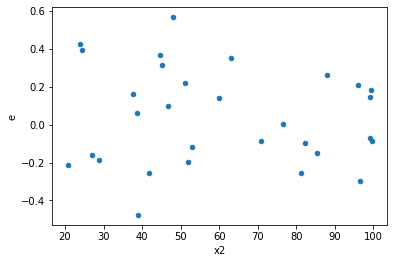

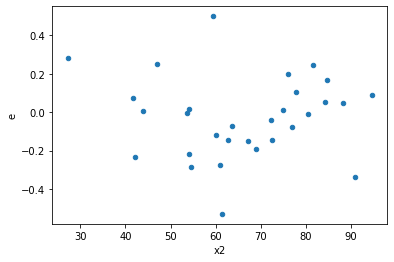

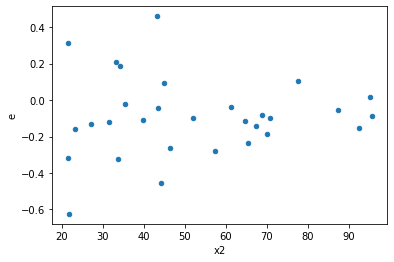

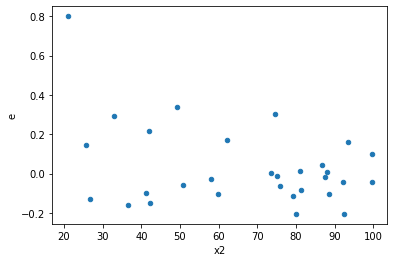

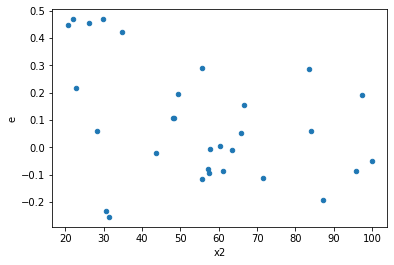

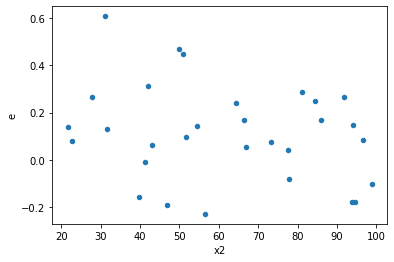

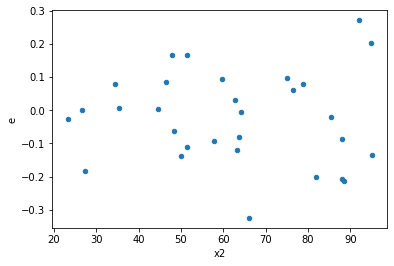

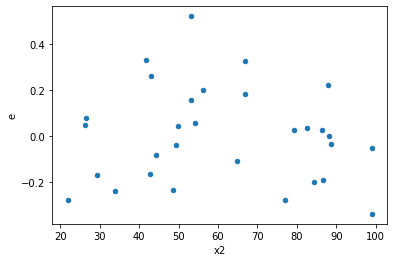

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,9.0,9.0,0.23084055829384934,0.2621761328917479,0.025648950921538814,0.029130681432416435,1.1357455328885917,0.8527169955112095,0.5736415022443953,0.42635849775560475,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,0.18155283253450083,0.31940633145825736,0.02017253694827787,0.03548959238425082,1.7593023859738457,0.41279706280706474,0.7936014685964676,0.20639853140353237,Reject005=1 : Homoscedasticity
10.0,9.0,9.0,0.416310625922808,0.48613222535013756,0.04625673621364533,0.05401469170557084,1.1677151508505474,0.8211198365782979,0.589440081710851,0.41055991828914895,Reject005=1 : Homoscedasticity
12.0,9.0,9.0,0.27167340079112495,0.27243483964671494,0.030185933421236107,0.03027053773852388,1.0028027729375515,0.996741852154692,0.501629073922654,0.498370926077346,Reject005=1 : Homoscedasticity
18.0,9.0,9.0,0.11597505774415345,0.3088943003832078,0.012886117527128161,0.034321588931467535,2.6634545943891097,0.16064122062618758,0.9196793896869062,0.08032061031309379,Reject005=1 : Homoscedasticity
19.0,9.0,9.0,0.27628601646631723,0.30754012156180277,0.030698446274035247,0.03417112461797808,1.1131222835495758,0.8757792237932849,0.5621103881033576,0.43788961189664244,Reject005=1 : Homoscedasticity
28.0,9.0,9.0,0.11900593044545076,0.4576009264418659,0.013222881160605639,0.05084454738242954,3.845194308628328,0.05750831052769212,0.9712458447361539,0.02875415526384606,Reject005=1 : Homoscedasticity
30.0,9.0,9.0,0.22475621034568719,0.2560821339677403,0.02497291226063191,0.028453570440860037,1.1393773438957358,0.8490692045263861,0.5754653977368069,0.42453460226319306,Reject005=1 : Homoscedasticity
33.0,9.0,9.0,0.2138081676290705,0.25884478120694154,0.023756463069896722,0.02876053124521573,1.2106402859969492,0.7804910605725486,0.6097544697137257,0.3902455302862743,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.30600565786622863,0.22375530444682096,0.03400062865180318,0.024861700494091216,0.7312129651688869,0.6485072733062291,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,0.24457581196177391,0.19021415288590532,0.02717509021797488,0.021134905876211703,0.7777308449276862,0.7141517198476776,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,0.23084055829384934,0.2621761328917479,0.025648950921538814,0.029130681432416435,1.1357455328885917,0.8527169955112095,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,0.580310237362766,0.1260109262381537,0.06447891526252955,0.01400121402646152,0.21714406902558434,0.032769093770476154,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,0.4416394863969475,0.1626284095649792,0.04907105404410528,0.01806982328499769,0.3682379283876082,0.15280752136117962,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,0.3014691927940434,0.08762628327802732,0.03349657697711593,0.009736253697558591,0.29066413873304636,0.07988497946839843,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,0.85064910630618,0.6422469770133723,0.09451656736735332,0.07136077522370804,0.755008113512558,0.6822733461293221,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,0.221672588538314,0.1720083899969706,0.024630287615368222,0.019112043332996733,0.7759569693807251,0.7116770931883247,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,0.18155283253450083,0.31940633145825736,0.02017253694827787,0.03548959238425082,1.7593023859738457,0.41279706280706474,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      852
Reject005=0 : Heteroscedasticity    148
Name: Result_test, dtype: int64